**Datacamp Project**

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [18]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


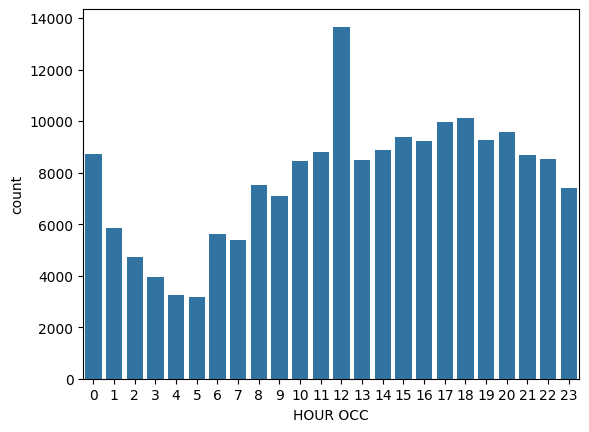

The hour with the highest frequency of crimes is: 12


In [19]:
#1. Finding frequencies of time by hour of occurance

#Extracting hours - Indexing first two characters and changing data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
crimes.head()

#Plotting frequencies
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

#Storing hour with highest frequency of crimes in an integer variable
peak_crime_hour = 12

print("The hour with the highest frequency of crimes is:", peak_crime_hour)

In [20]:
#2. Identifying area with the most night crime - Between 10 pm and 3:59 am

#Subsetting for night hours - 0 = midnight, don't include 4 am
night_crime = crimes[crimes["HOUR OCC"].isin([22, 23, 0, 1, 2, 3])]

#Counting crime by area and filtering for largest value
peak_night_crime_location = night_crime.groupby("AREA NAME", as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC", ascending=False).iloc[0]["AREA NAME"]

print("The area with the largest frequency of night crimes is:", peak_night_crime_location)

The area with the largest frequency of night crimes is: Central


In [21]:
#3. Crimes by age group

#Creating bins and labels

age_bins = [0, 17, 25, 34, 44, 54, 64, crimes["Vict Age"].max()]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

#Adding new column that contains Age Bracket values
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], labels=age_labels, bins=age_bins)
crimes[["Vict Age", "Age Bracket"]].head(10)

#Finding frequencies of crimes committed against different age groups
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Bracket, dtype: int64


26-34    0.255607
35-44    0.226998
45-54    0.152669
18-25    0.152336
55-64    0.108602
65+      0.079407
0-17     0.024381
Name: Age Bracket, dtype: float64


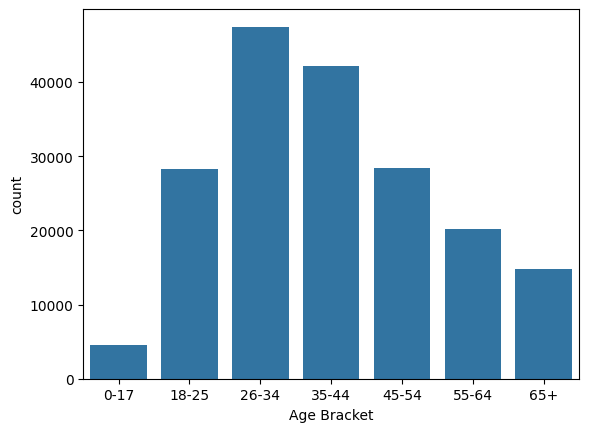

In [22]:
#x. Optional

#Normalizing frequency values
victim_ages_norm = crimes["Age Bracket"].value_counts(normalize=True)
print(victim_ages_norm)

#Plotting the count for each age bracket
sns.countplot(data=crimes, x="Age Bracket")
plt.show()